## **Optimization of Resources of Walmart Stores using Retail Analytics**





#Importing Liabraries

In [199]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly.graph_objects as go

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

#Features Data

In [200]:
feat = pd.read_csv('features.csv')

##Data Exploration & Preprocessisng

In [201]:
feat.head(10) 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [202]:
feat.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [203]:
feat.shape

(8190, 12)

In [204]:
feat.columns.values

array(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday'], dtype=object)

In [205]:
feat.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [206]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [207]:
feat.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [208]:
feat.isnull().values.any()

True

In [209]:
feat.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [210]:
feat['Date'] = pd.to_datetime(feat['Date'])

Here, to_datetime() is used to convert the string representation of the date in “Feat” to an actual date format for better visual representation

##Data Visualization

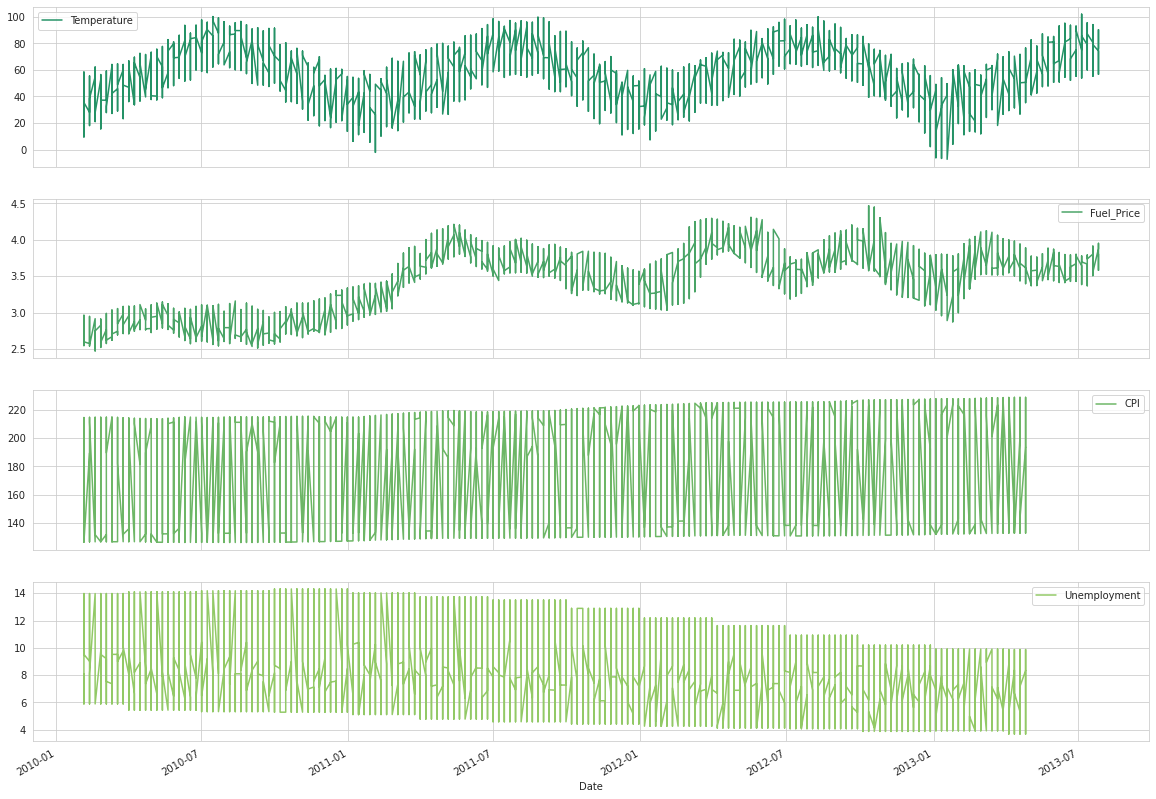

In [211]:
feat[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].plot(x='Date', subplots=True, figsize=(20,15));

**Temperature**: it seems like it is decently seasonal, which sounds reasonable when we talk about temperature on a YoY basis.<br>
**Fuel Price**: It shows a slightly positive trend. <br>
**Unemployment**: Slight negative trend in Unemployment during this period can be seen<br>
<br>


In [212]:
plot1= feat[["Temperature","Fuel_Price","Unemployment","CPI"]]

Let's explore effect of these feature with weekly sales.

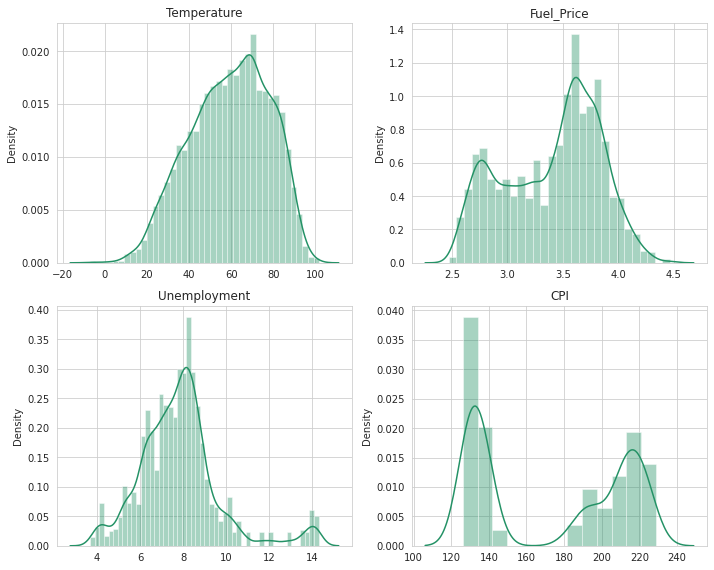

In [213]:
fig = plt.figure(figsize=(10,8))

for index, col in enumerate(plot1): 
    plt.subplot(2,2,index+1) 
    sns.distplot(plot1.loc[:,col].dropna(), kde=True) 
    plt.xlabel(None)
    plt.title(col, fontsize=12)
fig.tight_layout(pad=1.0) 

In [214]:
#feat[['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15));


•	Temperature highest lies mainly 40-80. CPI & Fuel price are unevenly distributed. <br>
•	Although skewness changes, correlation doesn't seem to change at all. Thus can be dropped. 

#Stores Data


In [215]:
stores = pd.read_csv('stores.csv')

##Data Exploration

In [216]:
stores.head(10) 

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [217]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [218]:
stores.shape

(45, 3)

In [219]:
stores.columns.values

array(['Store', 'Type', 'Size'], dtype=object)

In [220]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [221]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [222]:
stores.nunique()

Store    45
Type      3
Size     40
dtype: int64

In [223]:
stores.isnull().values.any()

False

In [224]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

##Data Visualization

In [225]:
fig = go.Figure()
fig.add_trace(go.Pie(labels = stores.Type, textposition='outside', hole=0.7))
fig.show()

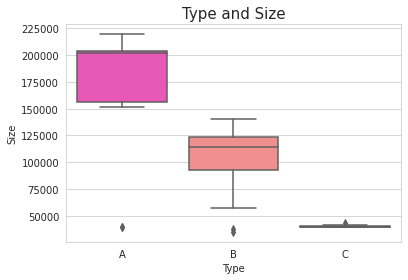

In [226]:
sns.set_style('whitegrid')
sns.boxplot(x='Type',y='Size',data=stores,palette='spring')
plt.title('Type and Size',fontsize=15);

•	As per boxplot and pie chart, we can deduce that store type A is the largest store and store C is the smallest store. <BR>
•	No overlapped area in size can be seen among A, B, and C.


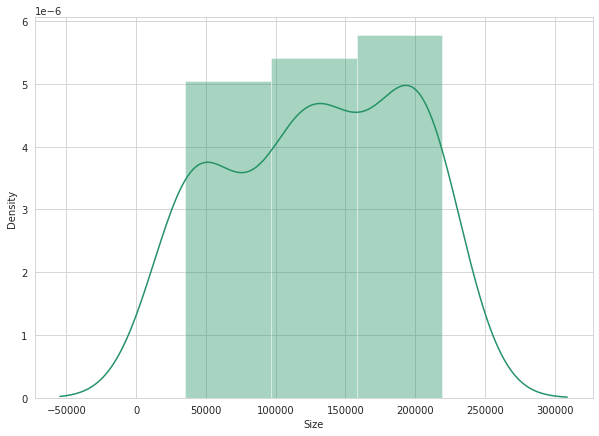

In [227]:
plt.figure(figsize=(10, 7))
sns.distplot(stores.Size);

Density increases with increase in size

#Sales Data

In [228]:
sales = pd.read_csv('sales.csv')

##Data Exploration & Preprocessisng

In [229]:
sales.head(10) 

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [230]:
sales.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [231]:
sales.shape

(421570, 5)

In [232]:
sales.columns.values

array(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype=object)

In [233]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [234]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [235]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [236]:
sales.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [237]:
sales.isnull().values.any()

False

In [238]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [239]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [240]:
sales['Week'] = sales['Date'].dt.isocalendar().week

sales['Year'] = sales['Date'].dt.isocalendar().year

##Data Visualization

In [241]:
weekly_sales = sales.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = sales.loc[sales['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = sales.loc[sales['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = sales.loc[sales['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})

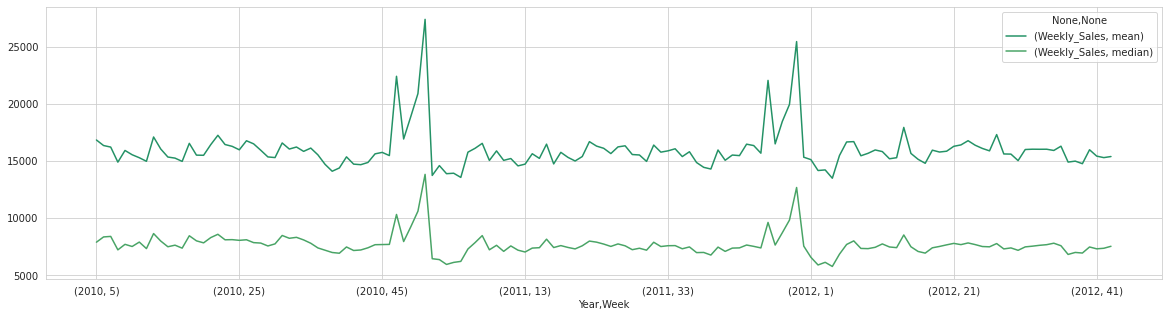

In [242]:
weekly_sales.plot(figsize=(20,5))

A trend can be seen over the years, with a significant increase in sales in weeks 51 and 47 (Christmas and Thanksgiving). The Super Bowl (week 6) and Labor Day (week 36) holidays had little effect on sales growth. <BR>
 Overall, the averages are much higher than median, indicating high dispersion and variance in store and department sales for a week.
The mean and the median are very different, suggesting that some stores/departments might sell much more than others.<BR>


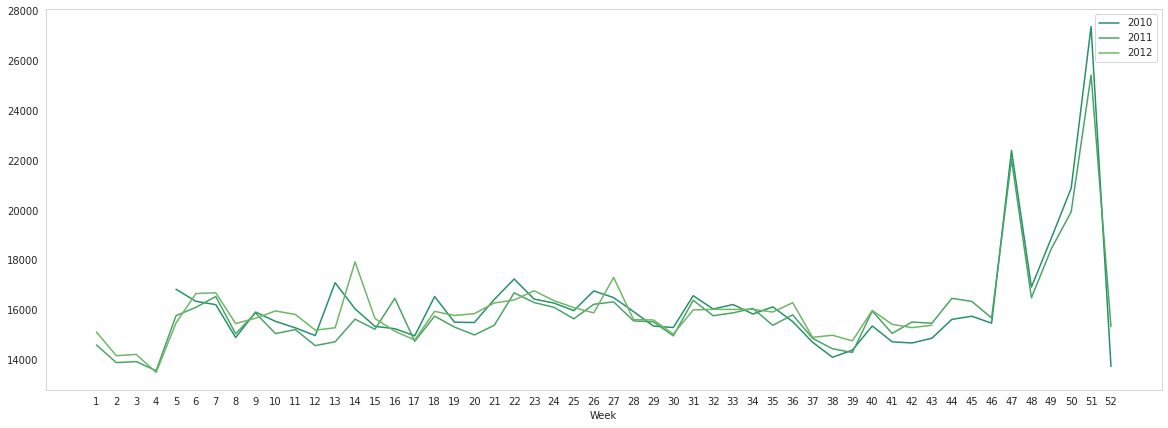

In [243]:
plt.figure(figsize=(20, 7))

sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()

* <b>Seasonality - High-Point:</b>It seems there are some seasonality to our data, where the end of December seems like a popular time to buy our company's specific products. A theory is that this has to do with the holidays and people buy gifts for each other, which seems reasonable.<br/>
* <b>Seasonality - Low-Point:</b> Around the end of january it seems to be a pretty steep dip in the different stores sales both during 2011 and 2012.

In [244]:
#A similar pattern can be seen over the years, with a significant increase in sales in weeks 51 and 47 (Christmas and Thanksgiving). The Superbowl (week 6) and LaborDay holidays (week 36) have little impact on increased sales volume.

#Combined Data

##Data Exploration

In [245]:
df_feat = feat.merge(stores, how='inner', on='Store')

In [246]:
df_feat.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


In [247]:
df = sales.merge(df_feat, how='inner',
                 on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)   

In [248]:
df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Week,Year,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,5,2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,6,2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,7,2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,8,2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,9,2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
5,1,1,2010-03-12,21043.39,False,10,2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,11,2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,12,2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
8,1,1,2010-04-02,57258.43,False,13,2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
9,1,1,2010-04-09,42960.91,False,14,2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315


In [249]:
df.columns.values

array(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Week',
       'Year', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'Type', 'Size'], dtype=object)

In [250]:
df.describe()

,Store,Dept,Weekly_Sales,Week,Year,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,25.826762,2010.968591,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,14.151887,0.796876,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,1.000000,2010.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,14.000000,2010.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,26.000000,2011.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,38.000000,2012.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,52.000000,2012.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Week          421570 non-null  UInt32        
 6   Year          421570 non-null  UInt32        
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [252]:
df.shape

(421570, 18)

In [253]:
df.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
Week                52
Year                 3
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
Type                 3
Size                40
dtype: int64

In [254]:
df.isnull().values.any()

True

In [255]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Week                 0
Year                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

The dataset has null records for the MarkDown variables. However, before removing them, we will analyze their correlation with the other variables in order to check their impact on weekly sales.

In [256]:
df=df.replace('None', np.nan)
df=df.replace('NaN', np.nan)
df=df.replace('NaT', np.nan)
df=df.replace('', np.nan)

In [257]:
#Null records are replaced by zero
df = df.fillna(0)

In [258]:
df.isnull().values.any()

False

In [261]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Week,Year,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,5,2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,6,2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,7,2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,8,2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,9,2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,39,2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,40,2012,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,41,2012,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,42,2012,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


##Data Visualization

Text(0.5, 1.0, 'Correlation Matrix')

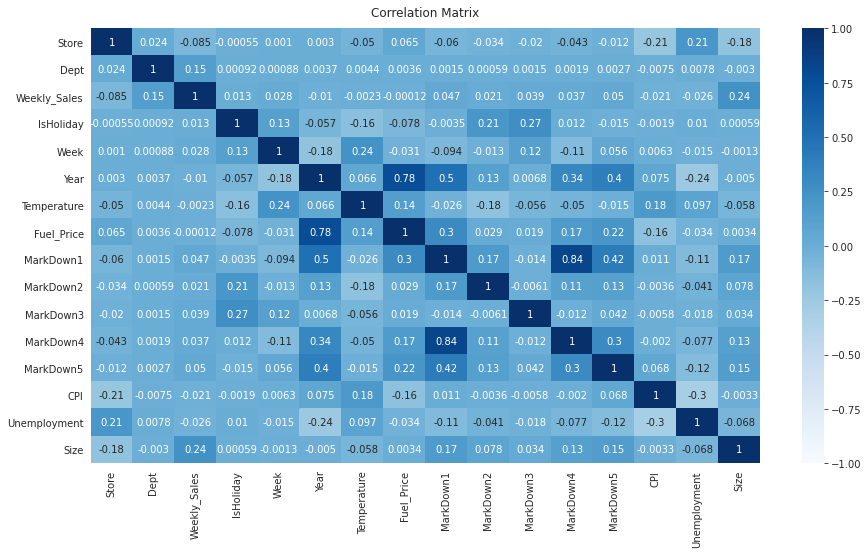

In [262]:
plt.figure(figsize=(15, 8))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap="Blues",annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':12}, pad=12)

The correlation matrix shows that the "Markdown" variables have a certain correlation with the IsHoliday variable, which can help in predicting. Therefore, these variables will not be eliminated at first.<BR>
The attributes with the highest correlation i.e, "Size", "Type" and "Dept" are used to train these models, in addition to "IsHoliday", which is needed to calculate the evaluation metrics and others. variables. "Store", "Week" and "Year" attributes, which are essential for identifying future records and forecasts.<BR>

### Holidays Analysis

The holiday dates are expected to have a greater weight in the model training, since in general they represent a greater volume of sales.

The code below shows all dates that represent holidays. It is observed that the holidays are in the same weeks (6, 36, 47 and 52) for all the years

Super Bowl:  WEEK 6
Labor Day: WEEK 36
Thanksgiving: WEEK 47
Christmas:  WEEK 52

In [263]:
holiday= df[['Date','Week','Year','IsHoliday']]

In [264]:
holiday = holiday.loc[holiday['IsHoliday']==True].drop_duplicates()

In [265]:
holiday

,Date,Week,Year,IsHoliday
1,2010-02-12,6,2010,True
31,2010-09-10,36,2010,True
42,2010-11-26,47,2010,True
47,2010-12-31,52,2010,True
53,2011-02-11,6,2011,True
83,2011-09-09,36,2011,True
94,2011-11-25,47,2011,True
99,2011-12-30,52,2011,True
105,2012-02-10,6,2012,True
135,2012-09-07,36,2012,True


In order to identify not only if it is holiday, but also which holiday it is, and try to improve the sales volume prediction for these dates, the IsHoliday binary variable is transformed to:

0 - if it is not a holiday <br/>
1 - if the holiday is SuperBowl<br/>
2 - if the holiday is LaborDay<br/>
3 - if the holiday is Thanksgiving<br/>
4 - if the holiday is Christmas

In [266]:
def holiday_type(x):
    if   (x['IsHoliday']== 1) & (x['Week']==6):
       return 1 #SuperBowl
    elif (x['IsHoliday']== 1) & (x['Week']==36):
       return 2 #LaborDay
    elif (x['IsHoliday']== 1) & (x['Week']==47):
       return 3 #Thanksgiving
    elif (x['IsHoliday']== 1) & (x['Week']==52):
       return 4 #Christmas
    else:
       return 0

In [267]:
df['IsHoliday'] = df.apply(holiday_type, axis=1)

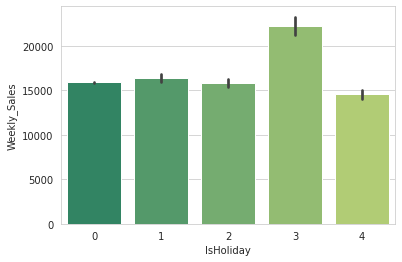

In [268]:
from numpy import mean
ax = sns.barplot(x='IsHoliday', y="Weekly_Sales", data=df, estimator=mean)

A trend can be seen over the years, with a significant increase in sales on Christmas (week 51) and Thanksgiving (week 47). Superbowl (week 6) and holidays (week 36) had little impact on increasing sales

###Weekly Sales Analysis

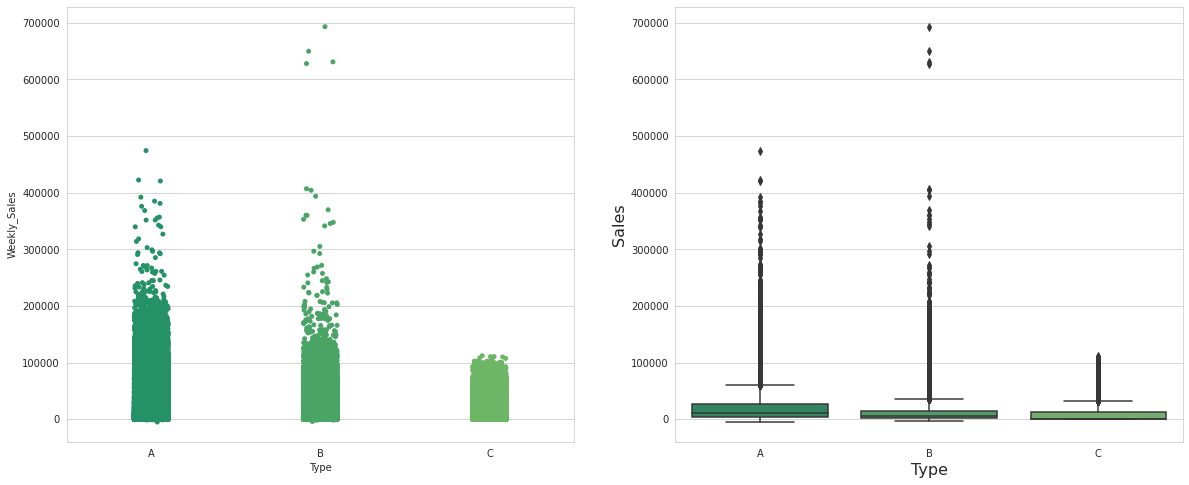

In [269]:

fig,ax = plt.subplots(1,2,figsize=(20, 8))
sns.boxplot(y=df.Weekly_Sales, x=df['Type'], ax=ax[1])
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Type', fontsize=16)
sns.stripplot(y=df.Weekly_Sales, x=df['Type'], ax=ax[0])
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Type', fontsize=16)
fig.show()

The "Type" attribute also seems to have some relation to weekly sales. Type "A" has a higher sales median than "B" and "C", and the sales values around this median are also more dispersed. Type "C"  tends to have lower weekly sales.

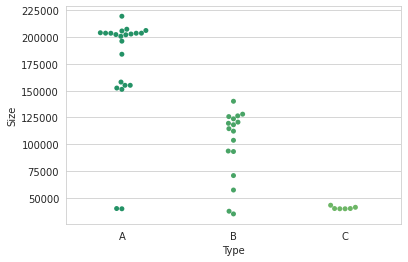

In [270]:
sns.swarmplot(data =stores,y="Size",x="Type")


To have better understanding size and type swarmplot is shown. It was observed that size wise A store has most no of item followed by B and then C

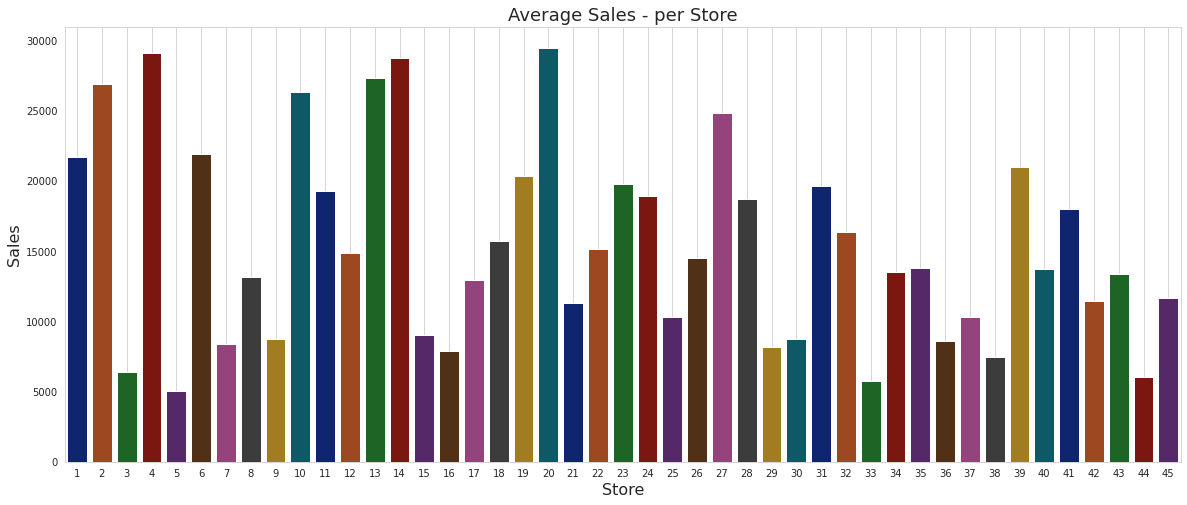

In [271]:
weekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()


Analysing the average weekly sales per store, some stores have been able to draw very high sales of 25000-30000 contrary to some whose average lie below 10000. 

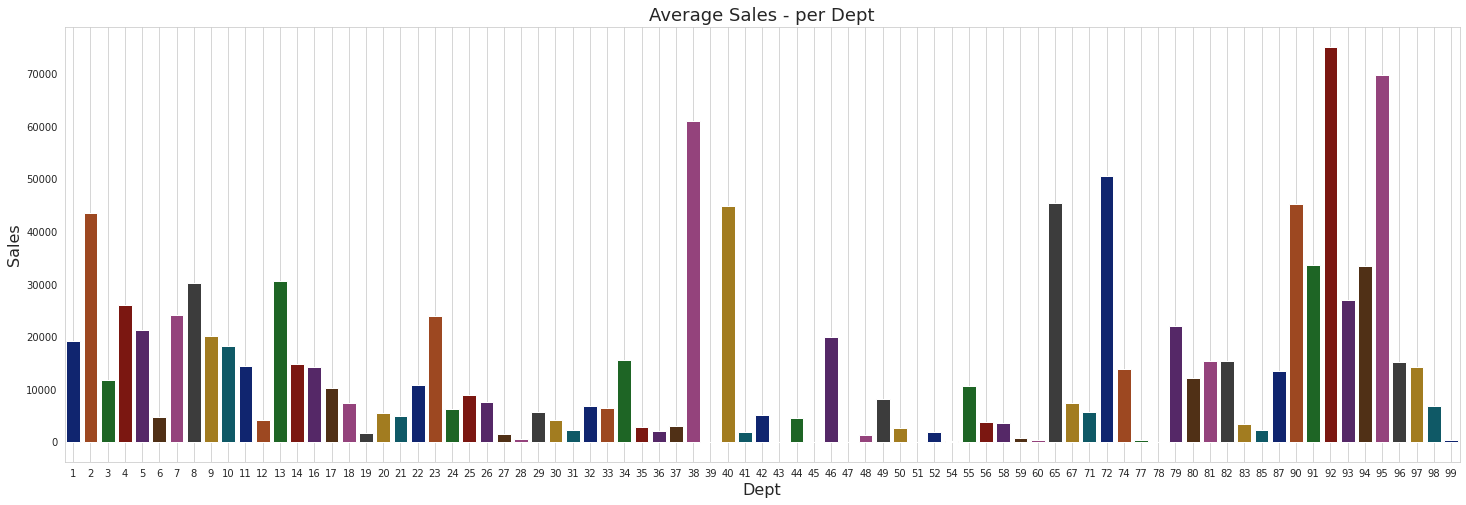

In [272]:
weekly_sales = df['Weekly_Sales'].groupby(df['Dept']).mean()
plt.figure(figsize=(25,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales - per Dept', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.show()

• About 10 departments are the lowest in sales. The company can further analyse the possible reasons and how it can be improved. <BR> 
 • Weekly sales by department came out to be more irregular, with departments with average sales ranging from 0 to more than 25000.  <BR>
 • Despite this discrepancy in weekly sales by department, this behaviour seems to remain stable over the years. Some departments have shown a decline in sales over many years, such as departments 18, 65 and 73. <BR>





In [273]:
#print(round(df['Dept'].value_counts(normalize=True),4).describe(percentiles=[0.20,0.40,0.60,0.80]))
dep = pd.DataFrame(df['Dept'].value_counts(normalize=True).values,columns=['Dept_freq'])
dep['Dept'] = df['Dept'].value_counts(normalize=True).index
data_n = pd.merge(df,dep,on='Dept',how='inner')
labels = ['rare','less frequent','moderately frequent','very frequent','most frequent']
bins = [0,0.0115,0.0136,0.0149,0.0153,np.inf]
data_n['Dep_type'] = pd.cut(data_n['Dept_freq'],bins=bins,labels=labels)
data_n = data_n.drop('Dept_freq',axis=1)

In [274]:
#plt.figure(figsize=(15,6), dpi=100)
#sns.boxplot(x='Dep_type',y='Weekly_Sales',data=data_n,hue='IsHoliday',showfliers=False)

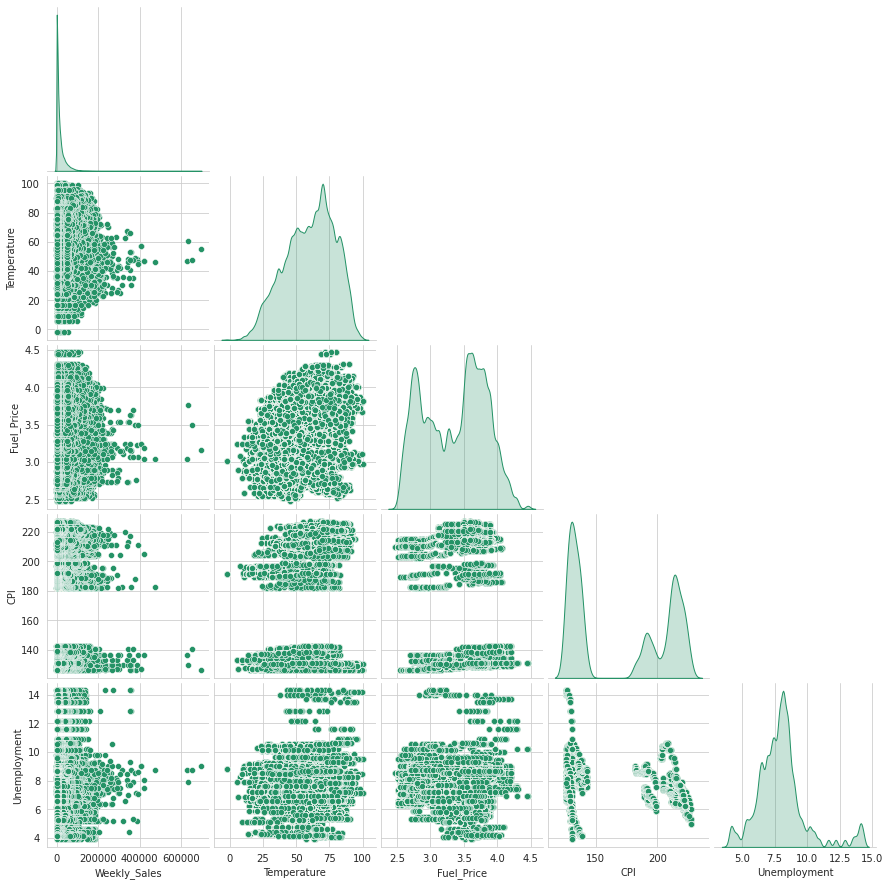

In [275]:

sns.set_palette("summer")
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']],
             corner=True,diag_kind="kde");

There is no specific relationship between these attributes and the target variable. In addition, the distribution of the target variable is very skewed. Therefore, we will not use it for prediction.

###Markdown Analysis

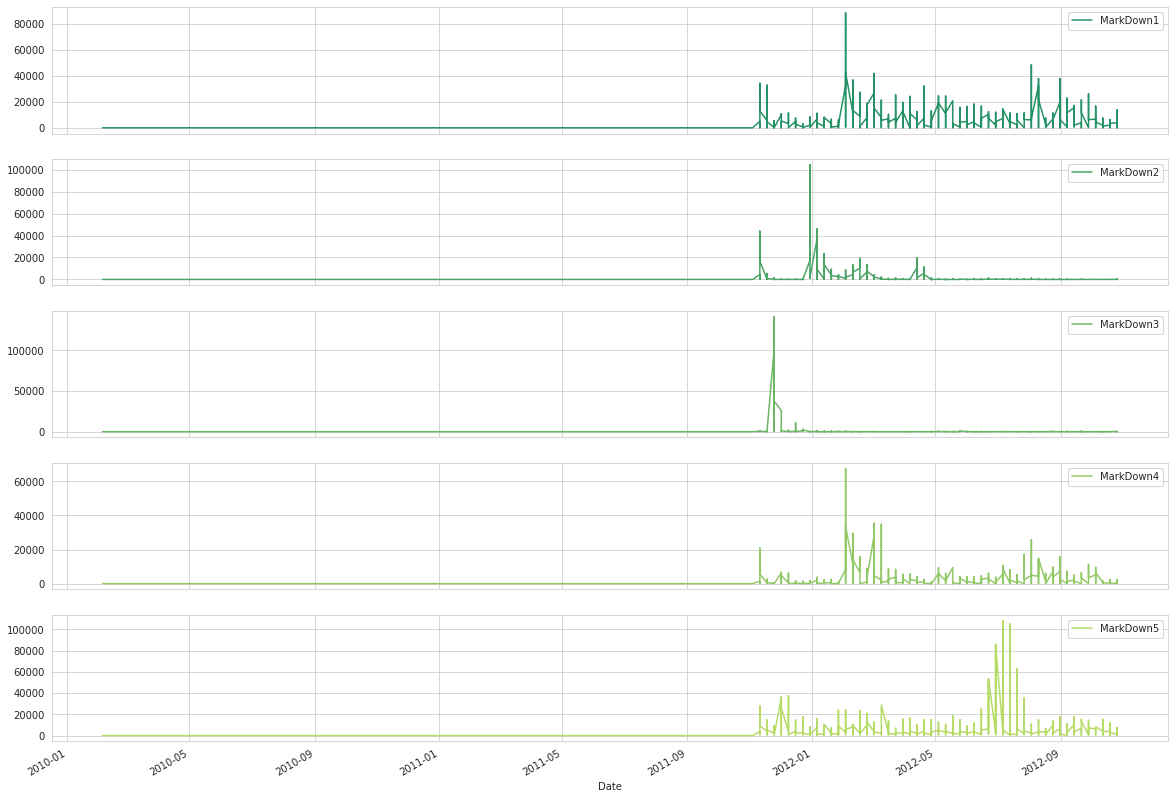

In [276]:

df[['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15));


MarkDown data is only available after Nov 2011, and is not available for all stores all the time. So,we'll drop these columns as well for prediction


In [277]:
df1=df.drop(['Date','MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], axis=1)

In [278]:
df1

,Store,Dept,Weekly_Sales,IsHoliday,Week,Year,Type,Size
0,1,1,24924.50,0,5,2010,A,151315
1,1,1,46039.49,1,6,2010,A,151315
2,1,1,41595.55,0,7,2010,A,151315
3,1,1,19403.54,0,8,2010,A,151315
4,1,1,21827.90,0,9,2010,A,151315
...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,39,2012,B,118221
421566,45,98,628.10,0,40,2012,B,118221
421567,45,98,1061.02,0,41,2012,B,118221
421568,45,98,760.01,0,42,2012,B,118221


#Model Prediction

In [279]:
#Seperating Features and Target
X = df1.copy().drop('Weekly_Sales', axis=1)
Y = df1['Weekly_Sales']

##Standardizing and Splitting the dataset

In [280]:
#Standardizing
X_scaled = preprocessing.scale(X)

ValueError: ignored

In [ ]:
X_scaled

In [ ]:
df1['Weekly_Sales']

In [ ]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape

In [ ]:
X_train

In [ ]:
Y_train

##Modelling

###KNeighbors Regressor

In [ ]:
#KNN 
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, Y_test)
knn_accuracy

In [ ]:
from sklearn import metrics

# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(Y_test, knn_Y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(Y_test, knn_Y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, knn_Y_pred))) #RMSE

# rSquared
score = r2_score(Y_test, knn_Y_pred)
print("R^2:", score)

###Decision Tree Regressor

In [ ]:
# Decision Tree

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
decision_tree_Y_pred =decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_test, Y_test)
decision_tree_accuracy

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(Y_test, decision_tree_Y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(Y_test, decision_tree_Y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, decision_tree_Y_pred))) #RMSE

# rSquared
score = r2_score(Y_test, decision_tree_Y_pred)
print("R^2:", score)

###Random Forest Regressor

In [ ]:
# Random Forest

random_forest = RandomForestRegressor(n_estimators=20)
random_forest.fit(X_train, Y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
random_forest_accuracy = random_forest.score(X_test, Y_test)
random_forest_accuracy

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(Y_test, random_forest_Y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(Y_test, random_forest_Y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test,random_forest_Y_pred))) #RMSE

# rSquared
score = r2_score(Y_test, random_forest_Y_pred)
print("R^2:", score)

###XGB Regressor

In [ ]:
#XGB Regressor
xg = XGBRegressor()
xg.fit(X_train, Y_train)
xg_Y_pred = xg.predict(X_test)
xg.score(X_train, Y_train)
xg_accuracy = xg.score(X_test, Y_test)
xg_accuracy

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(Y_test, xg_Y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(Y_test, xg_Y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test,xg_Y_pred))) #RMSE

# rSquared
score = r2_score(Y_test, xg_Y_pred)
print("R^2:", score)

Random Forest Regressor is the best fit model because MAE, MSE & RMSE are lowest in comparison to other models showing lesser amount of errors the system typically makes in its predictions, with higher weights given for large errors.
Also, accuracy of Random Forest Regressor is 97.52% which is the highest among all.


#Thank You